In [7]:
import os
import torch
import matplotlib.pyplot as plt

In [8]:
def load_results_from_checkpoints(checkpoint_dir, model_name):
    """
    Load results from checkpoints.

    Args:
        checkpoint_dir (str): Directory containing checkpoint files.

    Returns:
        results (dict): Dictionary containing lists of train_loss, train_acc, test_loss, and test_acc.
    """
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    checkpoint_files = sorted([f for f in os.listdir(checkpoint_dir) if f.endswith('.pth') and f.__contains__(model_name)])

    for checkpoint_file in checkpoint_files:
        checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file)
        checkpoint = torch.load(checkpoint_path)
        results["train_loss"].append(checkpoint['train_loss'])
        results["train_acc"].append(checkpoint['train_acc'])
        results["test_loss"].append(checkpoint['test_loss'])
        results["test_acc"].append(checkpoint['test_acc'])

    return results

In [9]:
def plot_results(results):
    """
    Plot results.

    Args:
        results (dict): Dictionary containing lists of train_loss, train_acc, test_loss, and test_acc.
    """
    epochs = range(1, len(results["train_loss"]) + 1)

    plt.figure(figsize=(10, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results["train_loss"], label="Train Loss")
    plt.plot(epochs, results["test_loss"], label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results["train_acc"], label="Train Accuracy")
    plt.plot(epochs, results["test_acc"], label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

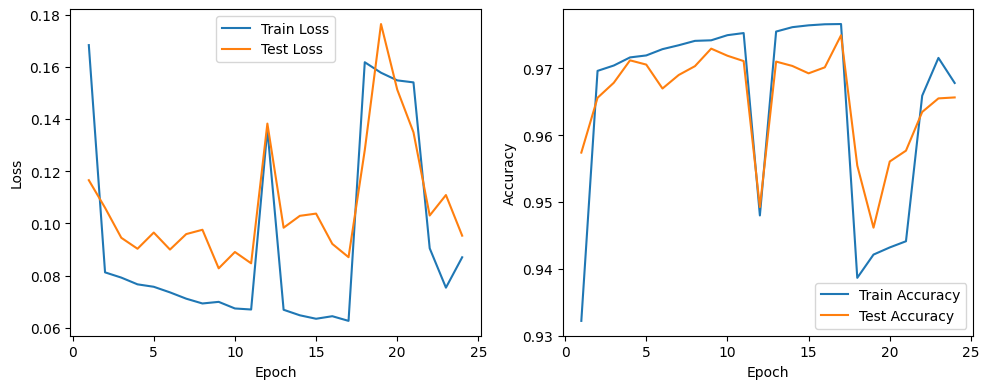

In [10]:
checkpoint_dir = "checkpoints"  # Directory containing checkpoint files
model_name = "EfficientNetV2"  # Model name
results = load_results_from_checkpoints(checkpoint_dir, model_name)
plot_results(results)

In [18]:
for i, loss in enumerate(results['train_loss']):
    print(i, loss)

0 0.1683872173626534
1 0.08126041686144111
2 0.07925263382217451
3 0.07666730910447069
4 0.07573504431651534
5 0.07358895824383707
6 0.07116885615447195
7 0.06933216402161221
8 0.0699517058148118
9 0.0674182363354429
10 0.06702208722474395
11 0.13611848776479338
12 0.06691899476775554
13 0.06479892091182765
14 0.0634724219955604
15 0.06445075932901662
16 0.06265999990139436
17 0.16181954819711075
18 0.1577997549788658
19 0.1548670002240861
20 0.1540945709293193
21 0.09047986831790324
22 0.07539598716542498
23 0.0870430927712161
